#Test Lytics
##Crear una aplicación en Python 3 (puede ser Jupyter notebook) que realice las siguientes funciones:
1 Obtenga desde esta URL automáticamente el registro de casos por Covid en Estados Unidos: https://github.com/nytimes/covid-19-data
2 Guarde el datos en un Dataframe de Pandas.
3 Genere una tabla con el resumen total de casos por día
4 Se genere una gráfica con el top 10 de días con más casos (se vale usar colores, descripciones, etc etc para hacerla muy ilustrativa)
5 Guarde la gráfica en un archivo local.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

Punto no. 1 y 2

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv"
dataframe=pd.read_csv(url)

In [3]:
dataframe

,date,county,state,fips,cases,deaths
0,2022-05-30,Autauga,Alabama,1001.0,15939,216.0
1,2022-05-30,Baldwin,Alabama,1003.0,56329,683.0
2,2022-05-30,Barbour,Alabama,1005.0,5695,99.0
3,2022-05-30,Bibb,Alabama,1007.0,6491,105.0
4,2022-05-30,Blount,Alabama,1009.0,15061,243.0
...,...,...,...,...,...,...
97741,2022-06-28,Sweetwater,Wyoming,56037.0,11564,126.0
97742,2022-06-28,Teton,Wyoming,56039.0,10807,16.0
97743,2022-06-28,Uinta,Wyoming,56041.0,5815,39.0
97744,2022-06-28,Washakie,Wyoming,56043.0,2481,44.0


Punto no. 3

In [4]:
df1 = dataframe.groupby(['date'])['cases'].sum()
df1.to_csv('df1.csv',index=True)

In [5]:
df2=pd.read_csv('df1.csv')
#df2

In [6]:
df3=pd.read_csv('df1.csv')
df3 = df3.drop([0],axis=0)
df3.reset_index(inplace=True, drop=True)
#df3

In [7]:
nueva_fila = {'date':'---', 'cases':0}
df3 = df3.append(nueva_fila, ignore_index=True)
#df3

C:\Users\flu17\AppData\Local\Temp\ipykernel_24596\915958193.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(nueva_fila, ignore_index=True)


In [8]:
df3['casos_dia']=df3['cases'].values-df2['cases'].values
#df3

In [9]:
df3.drop(df3.tail(1).index,inplace=True) 
#df3

In [10]:
dftop=df3.sort_values(by="casos_dia", ascending=False)
dftop=dftop.head(10)

dftop=dftop.sort_values(by='date')
dftop.set_index('date',inplace = True)

dftop

,cases,casos_dia
date,,
2022-05-31,84144606,182368
2022-06-01,84363873,219267
2022-06-03,84617408,142212
2022-06-06,84814640,137103
2022-06-07,84957469,142829
2022-06-08,85136683,179214
2022-06-15,85877078,172059
2022-06-21,86391069,209803
2022-06-22,86561951,170882


Punto no. 4

Text(0, 0.5, 'Número de casos')

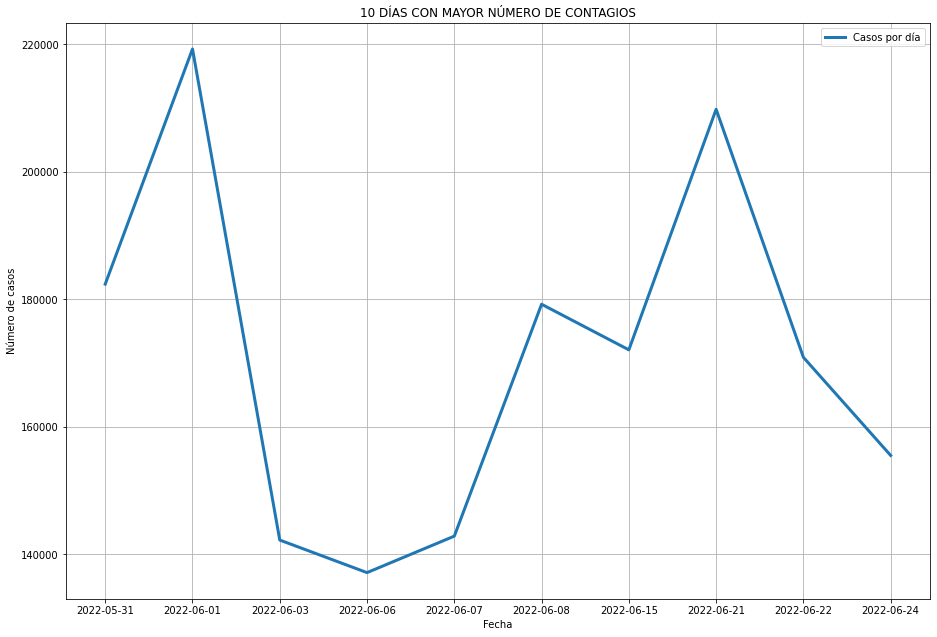

In [11]:
casos = dftop.casos_dia

fig = plt.figure()
rect = (0,0, 2, 2)

axes = fig.add_axes(rect)
axes.plot(casos,label='Casos por día', linewidth=3)
axes.legend()
axes.grid(True)
axes.set_title('10 DÍAS CON MAYOR NÚMERO DE CONTAGIOS')
axes.set_xlabel("Fecha")
axes.set_ylabel("Número de casos")


Punto no.5

In [12]:
fig.savefig("Top10casos.jpg", bbox_inches='tight')